# Format convert 
Change the formating of the accelerometer measurements taking by the AX3, Equivital, and Movesense devices to a common standard:

"DevType_DATETIME.csv"
DATETIME specifying the start time of the recording according to the device clock
inside columns: Time (ms), X, Y, Z


In [123]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json 
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

,DateTime,X,Y,Z,Time
0,2023-02-03 12:43:19.505,-0.500000,-0.265625,-0.968750,0.000
1,2023-02-03 12:43:19.510,-0.531250,-0.062500,-0.593750,0.005
2,2023-02-03 12:43:19.514,-0.546875,-0.046875,-0.671875,0.009
3,2023-02-03 12:43:19.520,-0.546875,-0.046875,-0.718750,0.015
4,2023-02-03 12:43:19.524,-0.531250,-0.031250,-0.750000,0.019
...,...,...,...,...,...
310075,2023-02-03 13:09:49.944,-0.468750,0.328125,-0.859375,1590.439
310076,2023-02-03 13:09:49.949,-0.453125,0.296875,-0.812500,1590.444
310077,2023-02-03 13:09:49.954,-0.468750,0.343750,-0.875000,1590.449
310078,2023-02-03 13:09:49.959,-0.453125,0.343750,-0.875000,1590.454


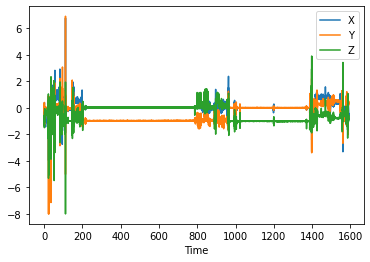

In [124]:
# AX3 1 Recorded in local time with no explicit indication of time zone

fileLoc = './RawMeasures/AX3_FEB03/17301_0000000001.csv' # 17301_0000000001.resampled.csv
df=pd.read_csv(fileLoc,header=None,names = ['DateTime','X','Y','Z'])
df['DateTime'] = pd.to_datetime(df.loc[:,'DateTime'])
start_time = df['DateTime'][0]
df['Time'] = (df['DateTime'] - start_time).dt.total_seconds()
df.plot(x='Time',y = ['X','Y','Z'])

#v = 1000*(df['Time'] - start_time).dt.Seconds()

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/AX3_ACC_' +start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-01-31 15:49:08.485000


,DateTime,X,Y,Z,Time
0,2023-01-31 15:49:08.485,-0.265625,0.187500,0.765625,0.000
1,2023-01-31 15:49:08.489,-0.187500,0.812500,0.437500,0.004
2,2023-01-31 15:49:08.494,-0.171875,0.750000,0.484375,0.009
3,2023-01-31 15:49:08.500,-0.171875,0.671875,0.531250,0.015
4,2023-01-31 15:49:08.505,-0.171875,0.562500,0.578125,0.020
...,...,...,...,...,...
295195,2023-01-31 16:13:38.959,0.140625,0.000000,0.843750,1470.474
295196,2023-01-31 16:13:38.965,0.125000,0.000000,0.828125,1470.480
295197,2023-01-31 16:13:38.970,0.125000,0.000000,0.812500,1470.485
295198,2023-01-31 16:13:38.974,0.109375,0.015625,0.812500,1470.489


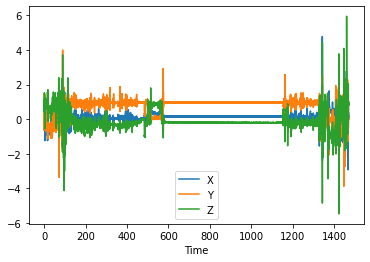

In [125]:
fileLoc = './RawMeasures/AX3_JAN31/ARJStandstill_17753_0000000001.csv' 
# insane error : 15:49:60.000 instead of 15:50:00.000 !! manually fixed in file
df=pd.read_csv(fileLoc,header=None,names = ['DateTime','X','Y','Z'])
df['DateTime'] = pd.to_datetime(df.loc[:,'DateTime'])
start_time = df['DateTime'][0]
print(start_time)
df['Time'] = (df['DateTime'] - start_time).dt.total_seconds()
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/AX3_ACC_' +start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-01-31 14:37:37.039000+00:00


,DateTime,Breathing,Vert Accelerometer,Lat Accelerometer,Long Accelerometer,Time,Z,Y,X
0,2023-01-31 14:37:37.039000+00:00,NaN,-43,998,59,0.000,-43,998,59
1,2023-01-31 14:37:37.078000+00:00,505.0,-27,956,47,0.039,-27,956,47
2,2023-01-31 14:37:37.117000+00:00,505.0,47,975,43,0.078,47,975,43
3,2023-01-31 14:37:37.156000+00:00,505.0,74,1002,43,0.117,74,1002,43
4,2023-01-31 14:37:37.195000+00:00,504.0,35,956,12,0.156,35,956,12
...,...,...,...,...,...,...,...,...,...
58754,2023-01-31 15:15:52.144000+00:00,553.0,-90,-35,-959,2295.105,-90,-35,-959
58755,2023-01-31 15:15:52.183000+00:00,553.0,-90,-35,-959,2295.144,-90,-35,-959
58756,2023-01-31 15:15:52.222000+00:00,552.0,-86,-39,-956,2295.183,-86,-39,-956
58757,2023-01-31 15:15:52.261000+00:00,552.0,-94,-35,-963,2295.222,-94,-35,-963


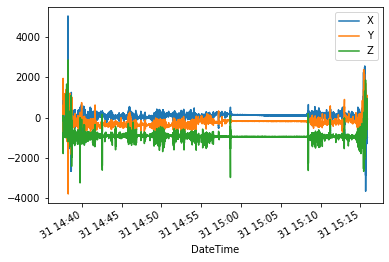

In [126]:
#Equivital

fileLoc = './RawMeasures/EQUIVITAL_CSV/RESPACC-Pilot_1-3420755-23013100.CSV' 
df = pd.read_csv(fileLoc,skipinitialspace=True)
# df=pd.read_csv(fileLoc,header=None,names = ['DateTime','X','Y','Z'])
df['DateTime'] = pd.to_datetime(df.loc[:,'DateTime'])
start_time = df['DateTime'][0]
print(start_time)
df['Time'] = (df['DateTime'] - start_time).dt.total_seconds()
df.loc[:,'Z'] = df.loc[:,'Vert Accelerometer']
df.loc[:,'Y'] = df.loc[:,'Lat Accelerometer']# is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'Long Accelerometer']
df.plot(x='DateTime',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Equivital_ACC_' +start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-02-03 11:39:37.039000+00:00


,DateTime,Breathing,Vert Accelerometer,Lat Accelerometer,Long Accelerometer,Time,Z,Y,X
0,2023-02-03 11:39:37.039000+00:00,NaN,-47,-55,-959,0.000,-47,-55,-959
1,2023-02-03 11:39:37.078000+00:00,521.0,-35,-23,-1037,0.039,-35,-23,-1037
2,2023-02-03 11:39:37.117000+00:00,528.0,-47,-109,-998,0.078,-47,-109,-998
3,2023-02-03 11:39:37.156000+00:00,532.0,-27,-62,-1073,0.117,-27,-62,-1073
4,2023-02-03 11:39:37.195000+00:00,534.0,-43,-51,-1006,0.156,-43,-51,-1006
...,...,...,...,...,...,...,...,...,...
41803,2023-02-03 12:06:49.980000+00:00,511.0,-101,-59,-928,1632.941,-101,-59,-928
41804,2023-02-03 12:06:50.019000+00:00,511.0,-101,20,-932,1632.980,-101,20,-932
41805,2023-02-03 12:06:50.058000+00:00,511.0,-125,-335,-889,1633.019,-125,-335,-889
41806,2023-02-03 12:06:50.097000+00:00,510.0,-113,-23,-936,1633.058,-113,-23,-936


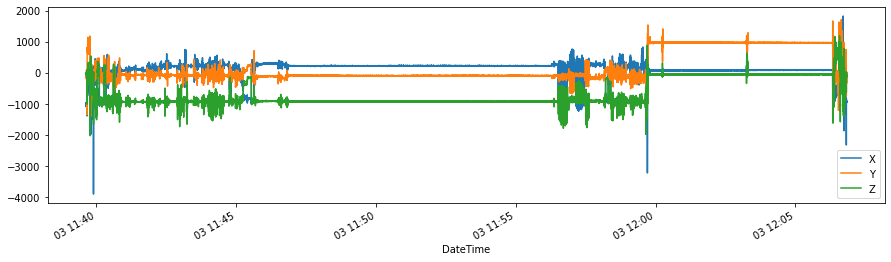

In [127]:
#Equivital

fileLoc = './RawMeasures/EQUIVITAL_CSV/RESPACC-Pilot_2-3420456-23020300.CSV' 
df = pd.read_csv(fileLoc,skipinitialspace=True)
# df=pd.read_csv(fileLoc,header=None,names = ['DateTime','X','Y','Z'])
df['DateTime'] = pd.to_datetime(df.loc[:,'DateTime'])
start_time = df['DateTime'][0]
print(start_time)
df['Time'] = (df['DateTime'] - start_time).dt.total_seconds()
df.loc[:,'Z'] = df.loc[:,'Vert Accelerometer']
df.loc[:,'Y'] = df.loc[:,'Lat Accelerometer']# is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'Long Accelerometer']
df.plot(x='DateTime',y = ['X','Y','Z'], figsize = [15,4])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Equivital_ACC_' +start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

In [128]:
df['DateTime']

0       2023-02-03 11:39:37.039000+00:00
1       2023-02-03 11:39:37.078000+00:00
2       2023-02-03 11:39:37.117000+00:00
3       2023-02-03 11:39:37.156000+00:00
4       2023-02-03 11:39:37.195000+00:00
                      ...               
41803   2023-02-03 12:06:49.980000+00:00
41804   2023-02-03 12:06:50.019000+00:00
41805   2023-02-03 12:06:50.058000+00:00
41806   2023-02-03 12:06:50.097000+00:00
41807   2023-02-03 12:06:50.136000+00:00
Name: DateTime, Length: 41808, dtype: datetime64[ns, UTC]

In [129]:
Time_segments={'floor':['2023-02-03 12:04:00.000000+00:00', '2023-02-03 12:06:00.000000+00:00'],
    'table':['2023-02-03 12:04:00.000000+00:00', '2023-02-03 12:06:00.000000+00:00'],
    'standing2':['2023-02-03 11:49:00.000000+00:00', '2023-02-03 11:51:00.000000+00:00'],
    'standing1':['2023-01-31 15:00:00.000000+00:00','2023-01-31 15:02:00.000000+00:00']}

# '2023-01-31 15:00:00.000000+00:00','2023-01-31 15:02:00.000000+00:00'
# '2023-02-03 11:49:00.000000+00:00', '2023-02-03 11:51:00.000000+00:00'
# '2023-02-03 12:01:00.000000+00:00', '2023-02-03 12:03:00.000000+00:00'
# '2023-02-03 12:04:00.000000+00:00', '2023-02-03 12:06:00.000000+00:00'

2023-01-31 14:57:27


,timestamp,x,y,z,Time,Z,Y,X
0,338757,-0.172289,9.250982,3.280677,0.000,3.280677,9.250982,-0.172289
1,338761,-0.141182,9.207911,3.357250,0.004,3.357250,9.207911,-0.141182
2,338766,-0.208183,9.155267,3.309392,0.009,3.309392,9.155267,-0.208183
3,338771,-0.215362,9.097836,3.323749,0.014,3.323749,9.097836,-0.215362
4,338776,-0.291935,9.136123,3.314178,0.019,3.314178,9.136123,-0.291935
...,...,...,...,...,...,...,...,...
148891,1045998,1.340029,9.181588,3.469717,707.241,3.469717,9.181588,1.340029
148892,1046003,1.366351,9.160052,3.503217,707.246,3.503217,9.160052,1.366351
148893,1046007,1.313707,9.128944,3.579791,707.250,3.579791,9.128944,1.313707
148894,1046012,1.301742,9.121766,3.622863,707.255,3.622863,9.121766,1.301742


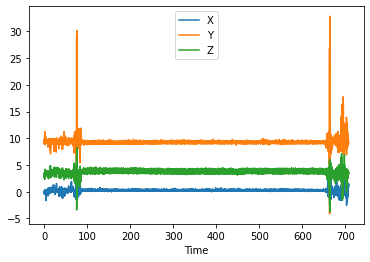

In [130]:
#Movesense
sessF = '20230131T145727Z_223130000594_acc_stream.csv'
data_loc = './RawMeasures/Movesense/'
df = pd.read_csv(data_loc + sessF)
dets = sessF.split('_')
start_time = dt.datetime.strptime(dets[0][:-1],'%Y%m%dT%H%M%S')
print(start_time)
df['Time'] = (df['timestamp']-df.loc[0,'timestamp'])/1000 # already in ms, int

df.loc[:,'Z'] = df.loc[:,'z']
df.loc[:,'Y'] = df.loc[:,'y'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'x']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Movesense_ACC_' + start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-02-03 11:44:58


,timestamp,x,y,z,Time,Z,Y,X
0,287096,1.086380,-10.009535,0.827946,0.000,0.827946,-10.009535,1.086380
1,287100,1.074416,-9.865960,0.772909,0.004,0.772909,-9.865960,1.074416
2,287105,1.141417,-9.669742,0.808803,0.009,0.808803,-9.669742,1.141417
3,287110,1.206026,-9.593168,0.856661,0.014,0.856661,-9.593168,1.206026
4,287115,1.119881,-9.585990,0.959556,0.019,0.959556,-9.585990,1.119881
...,...,...,...,...,...,...,...,...
179251,1138415,0.002393,-9.440022,1.057665,851.319,1.057665,-9.440022,0.002393
179252,1138420,-0.016750,-9.411307,1.115095,851.324,1.115095,-9.411307,-0.016750
179253,1138424,-0.014357,-9.370628,1.083987,851.328,1.083987,-9.370628,-0.014357
179254,1138429,-0.062216,-9.358664,1.227562,851.333,1.227562,-9.358664,-0.062216


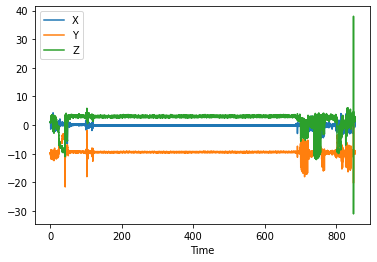

In [131]:
#Movesense
sessF = '20230203T114458Z_223130000594_acc_stream.csv'
data_loc = './RawMeasures/Movesense/'
df = pd.read_csv(data_loc + sessF)
dets = sessF.split('_')
start_time = dt.datetime.strptime(dets[0][:-1],'%Y%m%dT%H%M%S')
print(start_time)
df['Time'] = (df['timestamp']-df.loc[0,'timestamp'])/1000 # already in ms, int

df.loc[:,'Z'] = df.loc[:,'z']
df.loc[:,'Y'] = df.loc[:,'y'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'x']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Movesense_ACC_' + start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-02-03 12:00:18


,timestamp,x,y,z,Time,Z,Y,X
0,1207858,-0.136396,0.138789,9.688885,0.000,9.688885,0.138789,-0.136396
1,1207862,-0.114860,0.162718,9.758279,0.004,9.758279,0.162718,-0.114860
2,1207867,-0.100502,0.169896,9.784601,0.009,9.784601,0.169896,-0.100502
3,1207872,-0.143574,0.114860,9.705635,0.014,9.705635,0.114860,-0.143574
4,1207877,-0.153146,0.124431,9.717600,0.019,9.717600,0.124431,-0.153146
...,...,...,...,...,...,...,...,...
77067,1573858,-0.241684,0.033501,9.741528,366.000,9.741528,0.033501,-0.241684
77068,1573863,-0.220148,0.074180,9.765458,366.005,9.765458,0.074180,-0.220148
77069,1573867,-0.220148,0.023929,9.748708,366.009,9.748708,0.023929,-0.220148
77070,1573872,-0.198611,0.064609,9.767851,366.014,9.767851,0.064609,-0.198611


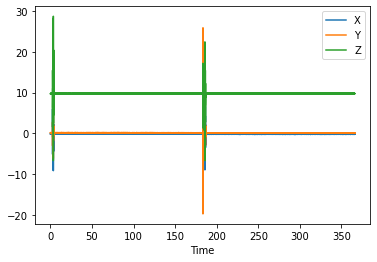

In [142]:
#Movesense
sessF = '20230203T120018Z_223130000594_acc_stream.csv'
data_loc = './RawMeasures/Movesense/' 
df = pd.read_csv(data_loc + sessF)
dets = sessF.split('_')
start_time = dt.datetime.strptime(dets[0][:-1],'%Y%m%dT%H%M%S')
print(start_time)
df['Time'] = (df['timestamp']-df.loc[0,'timestamp'])/1000 # already in ms, int

df.loc[:,'Z'] = df.loc[:,'z']
df.loc[:,'Y'] = df.loc[:,'y'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'x']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Movesense_ACC_' + start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-01-31 15:58:37


,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,...,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s),Time,Z,Y,X
0,0.062571,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,-0.0000,0.000000,0.000000,0.0,0.062571,0.0000,0.0000,0.0000
1,0.085386,-0.1261,0.3191,0.9624,-1.2038,2.6692,-0.3649,-0.0585,0.0512,-0.0522,...,-2.6745,-0.1849,-0.0000,59.932291,10.719913,0.0,0.085386,0.9624,0.3191,-0.1261
2,0.143617,-0.1153,0.3000,0.9577,-0.9261,2.1488,-0.3870,-0.0029,-0.0141,0.0125,...,-4.6278,-1.1957,-0.0000,59.932291,10.719913,0.0,0.143617,0.9577,0.3000,-0.1153
3,0.205395,-0.1068,0.2885,0.9492,-0.6990,1.7335,-0.4375,-0.0408,-0.0086,0.0174,...,-6.4051,-2.0420,-0.0000,59.932291,10.719913,0.0,0.205395,0.9492,0.2885,-0.1068
4,0.265911,-0.1197,0.2956,0.9567,-0.6879,1.4970,-0.3181,-0.0408,0.0128,-0.0254,...,-8.2075,-2.8656,-0.0000,59.932291,10.719913,0.0,0.265911,0.9567,0.2956,-0.1197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,603.482427,-0.8207,0.0608,0.5886,-0.0437,0.1870,0.1090,-0.0292,-0.1070,0.0064,...,-2.3912,-54.7212,53.2841,59.944297,10.713211,0.0,603.482427,0.5886,0.0608,-0.8207
10060,603.547080,-0.8092,0.0606,0.5895,0.0224,0.1724,0.0544,-0.0139,-0.1485,0.0376,...,-2.4624,-54.2583,53.2841,59.944297,10.713211,0.0,603.547080,0.5895,0.0606,-0.8092
10061,603.600897,-0.7994,0.0655,0.5749,0.1388,0.1499,-0.0548,0.1651,0.2052,0.0553,...,-2.8742,-54.4922,53.2841,59.944297,10.713211,0.0,603.600897,0.5749,0.0655,-0.7994
10062,603.661591,-0.8375,0.0496,0.6132,-0.1909,-0.0373,0.3859,-0.0567,-0.0251,-0.0174,...,-3.0589,-54.9499,53.2841,59.944297,10.713211,0.0,603.661591,0.6132,0.0496,-0.8375


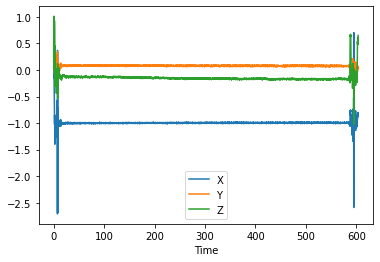

In [133]:
#Movesense
sessF = 'phone_20230131T155837.csv'
data_loc = './RawMeasures/' # 17301_0000000001.resampled.csv
df = pd.read_csv(data_loc + sessF)
dets = sessF.split('_')
start_time = dt.datetime.strptime(dets[1].split('.')[0],'%Y%m%dT%H%M%S')
print(start_time)
df['Time'] = df['time']

df.loc[:,'Z'] = df.loc[:,'gFz']
df.loc[:,'Y'] = df.loc[:,'gFy'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'gFx']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Phone_ACC_' + start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-02-03 12:46:37


,time,gFx,gFy,gFz,Time,Z,Y,X
0,0.065525,-0.0379,0.4656,0.8983,0.065525,0.8983,0.4656,-0.0379
1,0.125079,-0.0376,0.4341,0.9284,0.125079,0.9284,0.4341,-0.0376
2,0.185246,-0.0374,0.4439,0.8949,0.185246,0.8949,0.4439,-0.0374
3,0.249225,-0.0677,0.4644,0.9018,0.249225,0.9018,0.4644,-0.0677
4,0.305135,-0.0508,0.4652,0.8874,0.305135,0.8874,0.4652,-0.0508
...,...,...,...,...,...,...,...,...
33128,695.030436,-0.1009,0.2069,0.9765,695.030436,0.9765,0.2069,-0.1009
33129,695.051214,-0.0899,0.2143,0.9807,695.051214,0.9807,0.2143,-0.0899
33130,695.073550,-0.0904,0.2238,0.9939,695.073550,0.9939,0.2238,-0.0904
33131,695.091234,-0.1094,0.2189,1.0112,695.091234,1.0112,0.2189,-0.1094


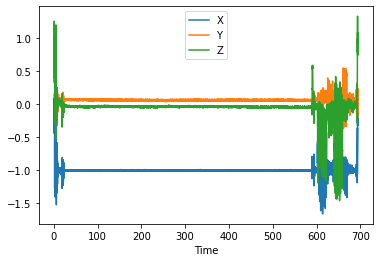

In [134]:
#Movesense
sessF = 'phone_20230203T124637.csv'
data_loc = './RawMeasures/' 
df = pd.read_csv(data_loc + sessF)
dets = sessF.split('_')
start_time = dt.datetime.strptime(dets[-1].split('.')[0],'%Y%m%dT%H%M%S')
print(start_time)
df['Time'] = df['time']

df.loc[:,'Z'] = df.loc[:,'gFz']
df.loc[:,'Y'] = df.loc[:,'gFy'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'gFx']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Phone_ACC_' + start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-02-03 13:00:08


,time,gFx,gFy,gFz,Time,Z,Y,X
0,0.034413,0.0132,-0.0217,0.9978,0.034413,0.9978,-0.0217,0.0132
1,0.063626,-0.0325,0.0117,1.0210,0.063626,1.0210,0.0117,-0.0325
2,0.065821,-0.0188,-0.0088,1.0225,0.065821,1.0225,-0.0088,-0.0188
3,0.087054,0.0159,-0.0159,0.9846,0.087054,0.9846,-0.0159,0.0159
4,0.106137,-0.0083,-0.0042,1.0090,0.106137,1.0090,-0.0042,-0.0083
...,...,...,...,...,...,...,...,...
7723,360.319156,0.0098,-0.0056,1.0005,360.319156,1.0005,-0.0056,0.0098
7724,360.339168,-0.0103,-0.0051,1.0256,360.339168,1.0256,-0.0051,-0.0103
7725,360.359494,-0.0027,0.0010,1.0051,360.359494,1.0051,0.0010,-0.0027
7726,360.379753,0.0042,-0.0078,1.0134,360.379753,1.0134,-0.0078,0.0042


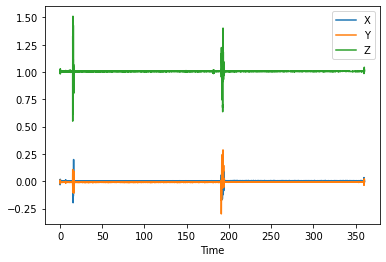

In [135]:
#Movesense
sessF = 'phone_liestill_20230203T130008.csv'
data_loc = './RawMeasures/' # 17301_0000000001.resampled.csv
df = pd.read_csv(data_loc + sessF)
dets = sessF.split('_')
start_time = dt.datetime.strptime(dets[-1].split('.')[0],'%Y%m%dT%H%M%S')
print(start_time)
df['Time'] = df['time']

df.loc[:,'Z'] = df.loc[:,'gFz']
df.loc[:,'Y'] = df.loc[:,'gFy'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'gFx']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Phone_ACC_' + start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

In [136]:
df.columns

Index(['time', 'gFx', 'gFy', 'gFz', 'Time', 'Z', 'Y', 'X'], dtype='object')

<AxesSubplot:xlabel='time'>

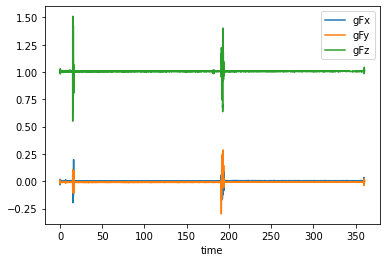

In [137]:
df.plot(x='time',y = ['gFx', 'gFy', 'gFz'])

2023-01-31 16:55:15.333000


,Frame,Time,Head X,Head Y,Head Z,RPhone X,RPhone Y,RPhone Z,LPhone X,LPhone Y,LPhone Z,Unnamed: 11,Z,Y,X
0,1,0.00000,640.999,-991.102,1830.132,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2,0.00417,640.949,-991.087,1830.086,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,0.00833,640.982,-991.104,1830.065,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
3,4,0.01250,640.981,-991.103,1830.090,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
4,5,0.01667,641.042,-991.073,1830.098,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189240,189241,788.50000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
189241,189242,788.50417,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
189242,189243,788.50833,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
189243,189244,788.51250,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0


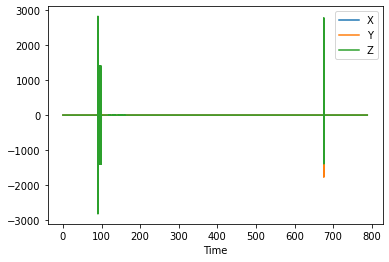

In [138]:
#Movesense
sessF = 'Clapper_Test0015.tsv'
data_loc = './RawMeasures/' # 17301_0000000001.resampled.csv
df = pd.read_csv(data_loc + sessF,sep='\t',header=11,)
# dets = sessF.split('_')
start_time = dt.datetime.strptime('2023-01-31, 16:55:15.333','%Y-%m-%d, %H:%M:%S.%f')
print(start_time)
df['Time'] = df['Time']

df.loc[:,'Z'] = df.loc[:,'RPhone Z'].diff().diff()
df.loc[:,'Y'] = df.loc[:,'RPhone Y'].diff().diff() # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'RPhone X'].diff().diff()
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Qualsys_LOC_' + start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

In [139]:
df.columns

Index(['Frame', 'Time', 'Head X', 'Head Y', 'Head Z', 'RPhone X', 'RPhone Y',
       'RPhone Z', 'LPhone X', 'LPhone Y', 'LPhone Z', 'Unnamed: 11', 'Z', 'Y',
       'X'],
      dtype='object')

In [140]:
start_time.strftime('%Y%m%dT%H%M%S%f')[:-3]# d.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3]

'20230131T165515333'

In [141]:
pd.to_datetime('20230203T120018000',format = '%Y%m%dT%H%M%S%f')

Timestamp('2023-02-03 12:00:18')

In [ ]:
Noise level? 
QOM 

maxima

vector norm 
lying still conditions 
    (floor, table, standstill2, Stanstill1) 
steady deviance per second, 
per sample
rectified range: minus mean and rectified 
    


Clock differences




# Align and plot

Identify intervals to plot over, then read over measurements and plot them against one another 

In [93]:
def min_dets(eq_file_loc): # for files output by the lab manager desktop app, so far
    filings = eq_file_loc.split('/')
    file_name = filings[-1]
    f = file_name.split('.')[0]
    dets = f.split('_')

    File_dets={'Signal':dets[1], #f[-2].split('_')[-1],
       'Sensor':dets[0], 
       'StartTime':pd.to_datetime(dets[2],format = '%Y%m%dT%H%M%S%f'),
       'FileName':file_name,
       'FullLoc':eq_file_loc}
    return File_dets

In [94]:
path = './OUTFILES/'
file_locs = []
for root, dirs, files in os.walk(path):
    for file in files:
        if(file.lower().endswith(".csv")):
            file_locs.append(os.path.join(root,file))
            print(file_locs[-1])
k=[]           
for f in file_locs:
    if len(f.split('_'))==3:
        File_dets=min_dets(f)
        k.append(File_dets)
df_files=pd.DataFrame(data=k) #.sort_values('StartTime').reset_index(drop=True)
df_files

./OUTFILES/Movesense_ACC_20230203T120018000.csv
./OUTFILES/Equivital_ACC_20230131T143737039.csv
./OUTFILES/AX3_ACC_20230131T154908485.csv
./OUTFILES/Movesense_ACC_20230203T114458000.csv
./OUTFILES/AX3_ACC_20230203T124319505.csv
./OUTFILES/Movesense_ACC_20230131T145727000.csv
./OUTFILES/Equivital_ACC_20230203T113937039.csv


,Signal,Sensor,StartTime,FileName,FullLoc
0,ACC,Movesense,2023-02-03 12:00:18.000,Movesense_ACC_20230203T120018000.csv,./OUTFILES/Movesense_ACC_20230203T120018000.csv
1,ACC,Equivital,2023-01-31 14:37:37.039,Equivital_ACC_20230131T143737039.csv,./OUTFILES/Equivital_ACC_20230131T143737039.csv
2,ACC,AX3,2023-01-31 15:49:08.485,AX3_ACC_20230131T154908485.csv,./OUTFILES/AX3_ACC_20230131T154908485.csv
3,ACC,Movesense,2023-02-03 11:44:58.000,Movesense_ACC_20230203T114458000.csv,./OUTFILES/Movesense_ACC_20230203T114458000.csv
4,ACC,AX3,2023-02-03 12:43:19.505,AX3_ACC_20230203T124319505.csv,./OUTFILES/AX3_ACC_20230203T124319505.csv
5,ACC,Movesense,2023-01-31 14:57:27.000,Movesense_ACC_20230131T145727000.csv,./OUTFILES/Movesense_ACC_20230131T145727000.csv
6,ACC,Equivital,2023-02-03 11:39:37.039,Equivital_ACC_20230203T113937039.csv,./OUTFILES/Equivital_ACC_20230203T113937039.csv


Structure:
    